In [37]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
import sklearn
import random

In [39]:
from sklearn.utils import shuffle

In [40]:
d=pd.read_csv('creditcard.csv')

C:\Users\padma\AppData\Local\Temp\ipykernel_16224\1360372687.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(d['Amount'])


<Axes: xlabel='Amount', ylabel='Density'>

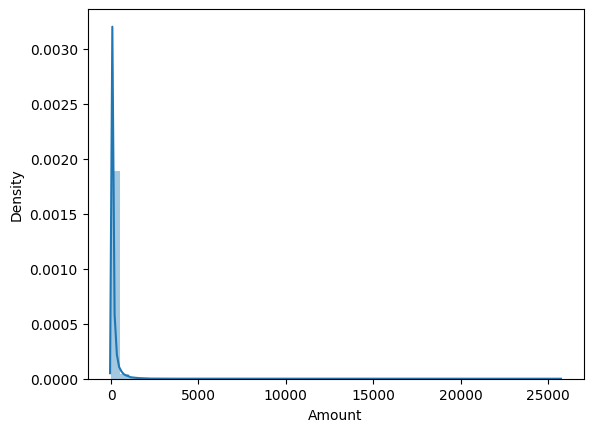

In [41]:
sns.distplot(d['Amount'])

C:\Users\padma\AppData\Local\Temp\ipykernel_16224\1654913436.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(d['Time'])


<Axes: xlabel='Time', ylabel='Density'>

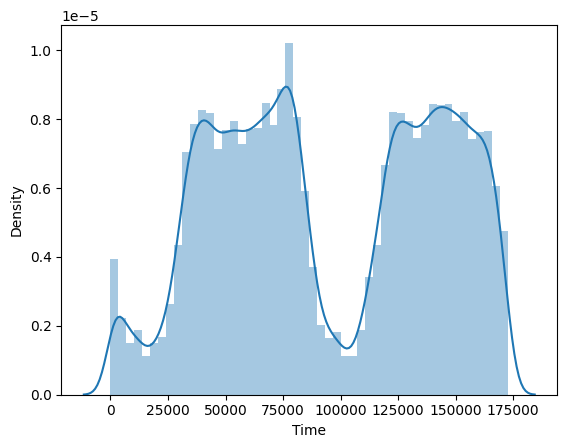

In [42]:
sns.distplot(d['Time'])

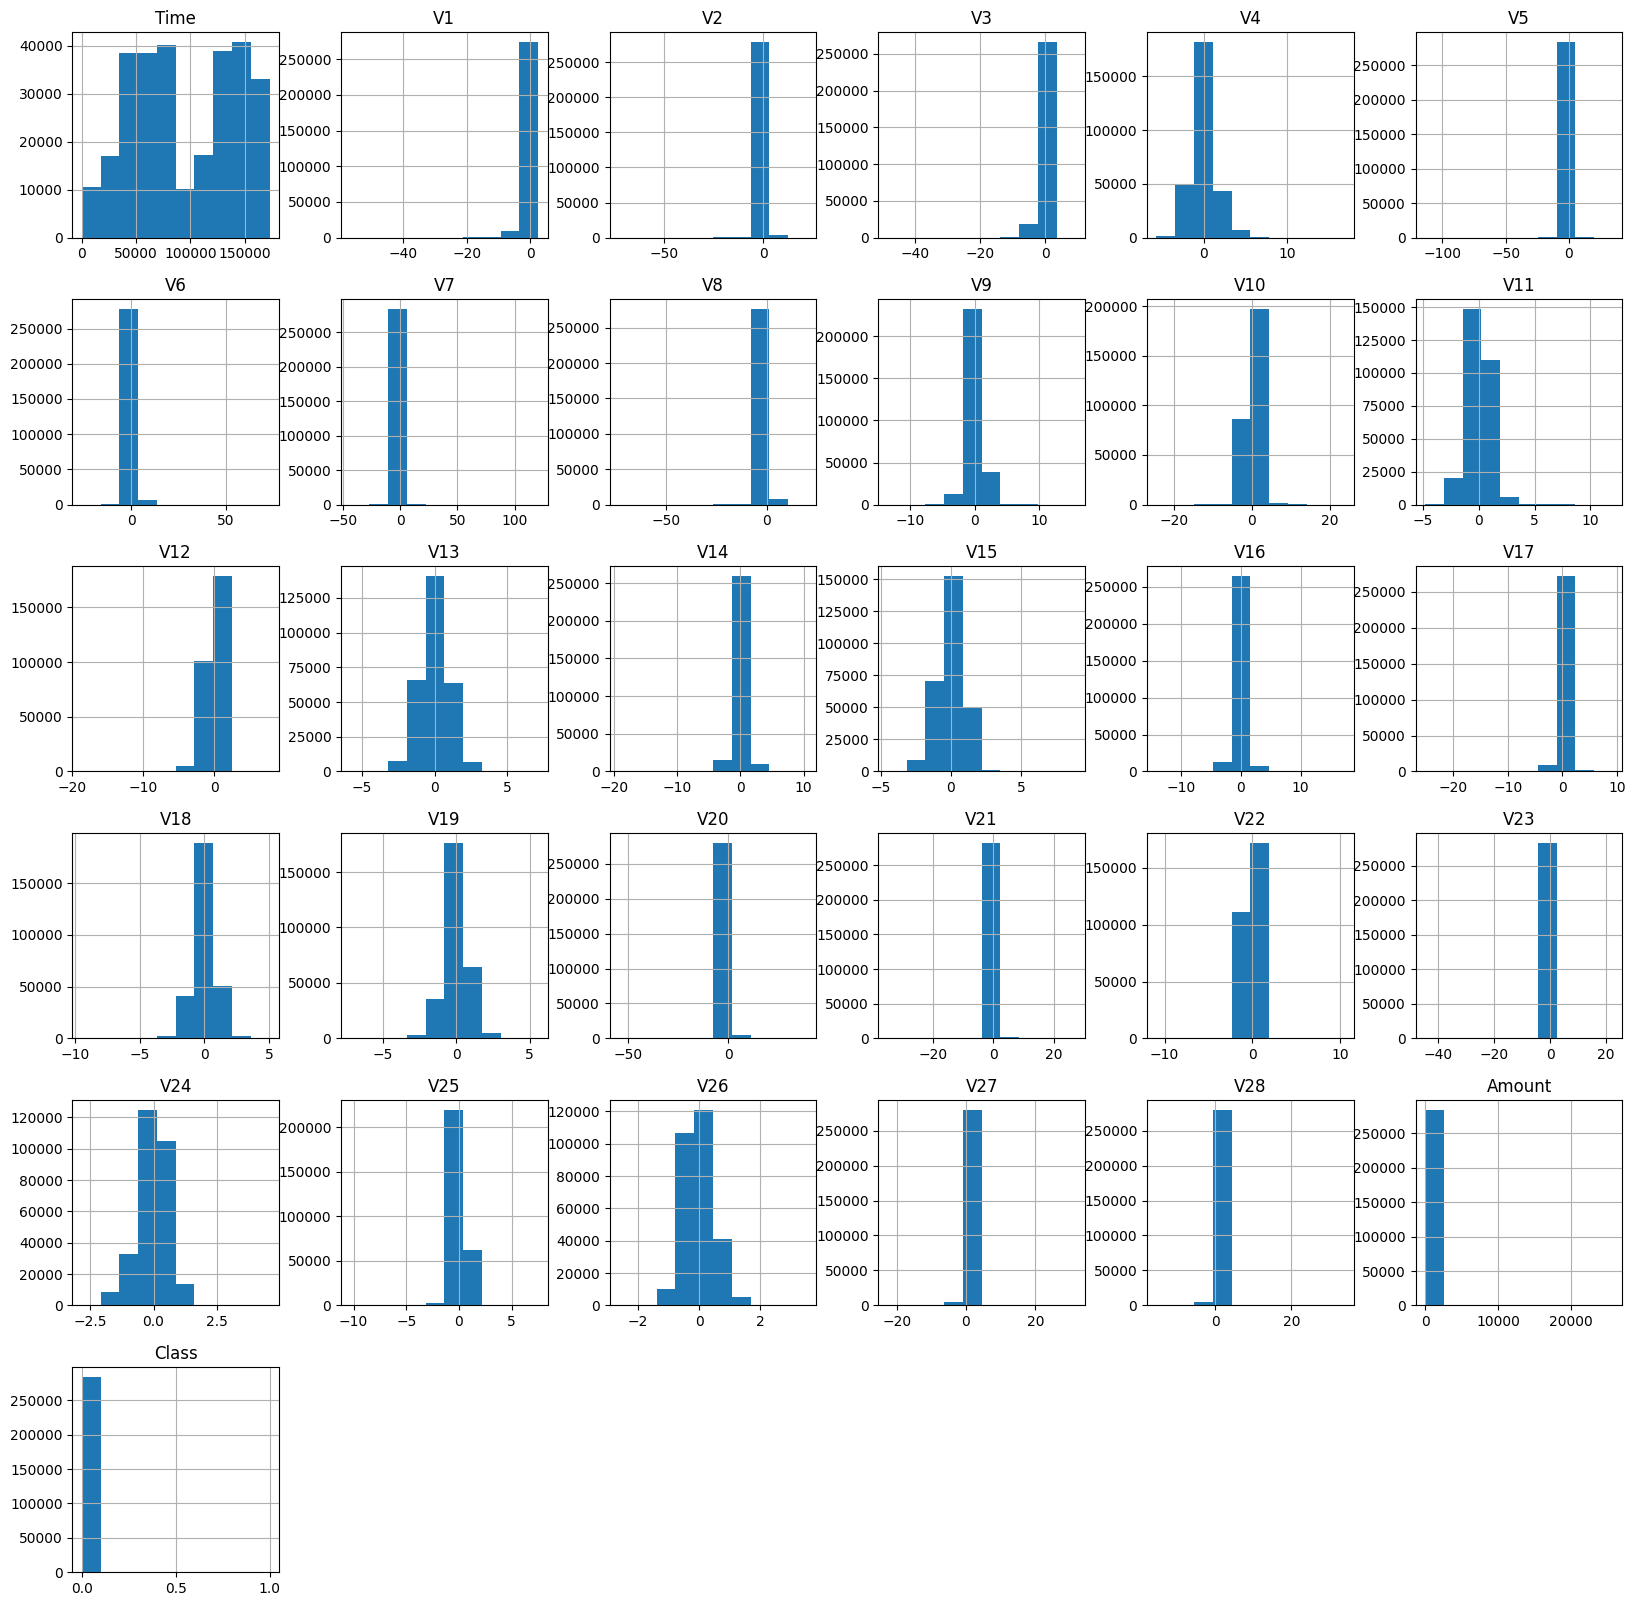

In [43]:
d.hist(figsize=(20,20))
plt.show()

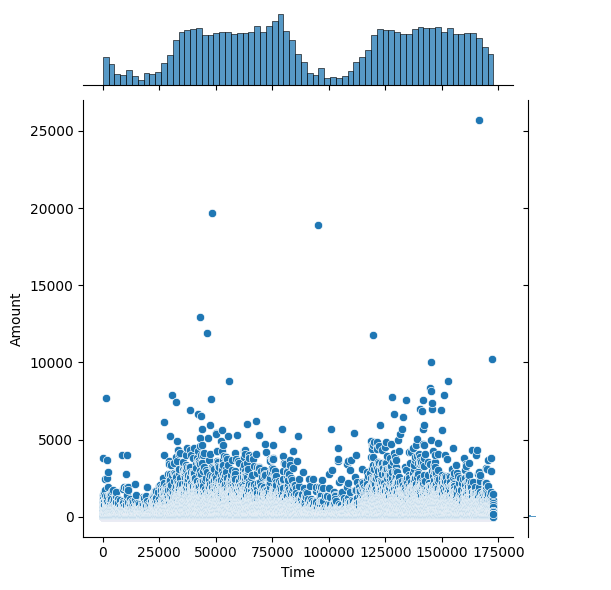

In [44]:
sns.jointplot(x= 'Time', y= 'Amount', data= d)

In [45]:
class0 = d[d['Class']==0]

len(class0)

class1 = d[d['Class']==1]

len(class1)

class0
temp = shuffle(class0)

d1 = temp.iloc[:2000,:]

d1

frames = [d1, class1]
df_temp = pd.concat(frames)

df_temp.info()

df= shuffle(df_temp)



<class 'pandas.core.frame.DataFrame'>
Index: 2492 entries, 245112 to 281674
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    2492 non-null   float64
 1   V1      2492 non-null   float64
 2   V2      2492 non-null   float64
 3   V3      2492 non-null   float64
 4   V4      2492 non-null   float64
 5   V5      2492 non-null   float64
 6   V6      2492 non-null   float64
 7   V7      2492 non-null   float64
 8   V8      2492 non-null   float64
 9   V9      2492 non-null   float64
 10  V10     2492 non-null   float64
 11  V11     2492 non-null   float64
 12  V12     2492 non-null   float64
 13  V13     2492 non-null   float64
 14  V14     2492 non-null   float64
 15  V15     2492 non-null   float64
 16  V16     2492 non-null   float64
 17  V17     2492 non-null   float64
 18  V18     2492 non-null   float64
 19  V19     2492 non-null   float64
 20  V20     2492 non-null   float64
 21  V21     2492 non-null   float64
 22

In [46]:
df.to_csv('creditcardsampling.csv')

<Axes: xlabel='Class', ylabel='count'>

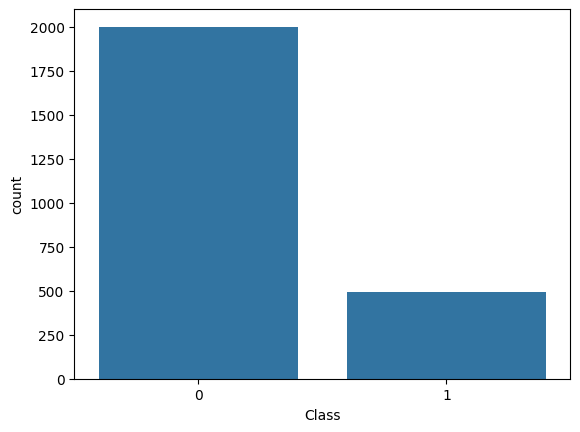

In [47]:
sns.countplot(x='Class', data=df)

In [48]:
import imblearn

from imblearn.over_sampling import  SMOTE
oversample=SMOTE()
X=df.iloc[ : ,:-1]
Y=df.iloc[: , -1]
X,Y=oversample.fit_resample(X,Y)

X=pd.DataFrame(X)
X.shape
Y=pd.DataFrame(Y)
Y.head()


,Class
0,0
1,0
2,1
3,1
4,1


In [49]:
names=['Time','V1','V2','V3','V4','V5','V6','V7','V8','V9','V10','V11','V12','V13','V14','V15','V16','V17','V18','V19','V20','V21','V22','V23','V24','V25','V26','V27','V28','Amount','Class']

data=pd.concat([X,Y],axis=1)

d=data.values

data=pd.DataFrame(d,columns=names)

<Axes: xlabel='Class', ylabel='count'>

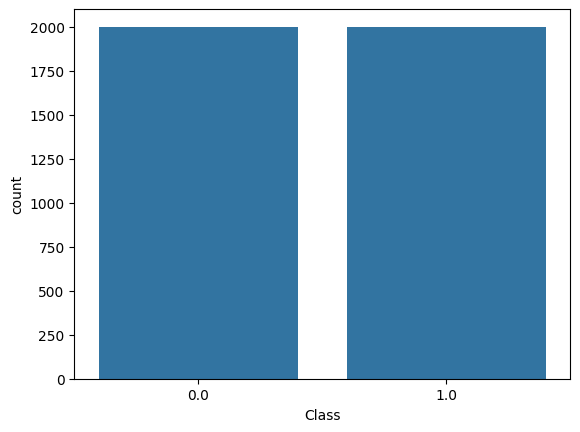

In [50]:
sns.countplot(x='Class', data=data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    4000 non-null   float64
 1   V1      4000 non-null   float64
 2   V2      4000 non-null   float64
 3   V3      4000 non-null   float64
 4   V4      4000 non-null   float64
 5   V5      4000 non-null   float64
 6   V6      4000 non-null   float64
 7   V7      4000 non-null   float64
 8   V8      4000 non-null   float64
 9   V9      4000 non-null   float64
 10  V10     4000 non-null   float64
 11  V11     4000 non-null   float64
 12  V12     4000 non-null   float64
 13  V13     4000 non-null   float64
 14  V14     4000 non-null   float64
 15  V15     4000 non-null   float64
 16  V16     4000 non-null   float64
 17  V17     4000 non-null   float64
 18  V18     4000 non-null   float64
 19  V19     4000 non-null   float64
 20  V20     4000 non-null   float64
 21  V21     4000 non-null   float64
 22  

<Axes: >

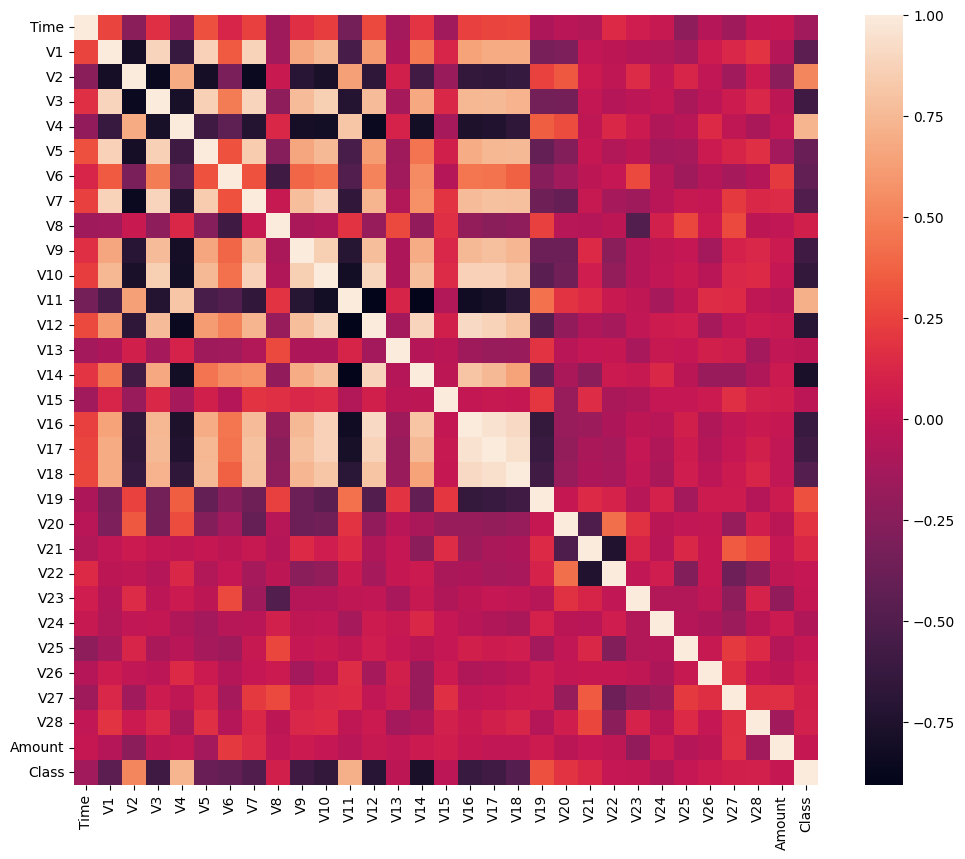

In [51]:

data.describe()

data.info()

plt.figure(figsize=(12,10))
sns.heatmap(data.corr())

In [52]:
import math
import sklearn.preprocessing

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score , classification_report, confusion_matrix, precision_recall_curve, f1_score, auc

In [53]:
X_train, X_test, y_train, y_test = train_test_split(data.drop('Class', axis=1), data['Class'], test_size=0.3, random_state=42)

In [54]:
cols= ['V22', 'V24', 'V25', 'V26', 'V27', 'V28']

scaler = StandardScaler()

frames= ['Time', 'Amount']

x= data[frames]

d_temp = data.drop(frames, axis=1)

temp_col=scaler.fit_transform(x)

scaled_col = pd.DataFrame(temp_col, columns=frames)

scaled_col.head()

d_scaled = pd.concat([scaled_col, d_temp], axis =1)

d_scaled.head()

y = data['Class']

d_scaled.head()

,Time,Amount,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-0.482650,0.038050,1.151334,-0.775290,0.217952,-0.561325,-1.126350,-0.895222,-0.275062,-0.184617,...,-0.260730,-0.259641,-0.525929,-0.032529,0.585169,0.183215,0.998883,-0.088023,0.014548,0.0
1,-1.365827,-0.383905,-4.333096,6.014477,-4.477278,0.551707,0.010958,-1.925930,0.349347,0.291680,...,2.928765,-0.904281,-0.856408,0.367327,-0.590912,0.775490,-0.311917,2.402595,1.274639,0.0
2,-1.262916,-0.000485,-25.266355,14.323254,-26.823673,6.349248,-18.664251,-4.647403,-17.971212,16.633103,...,1.658289,1.780701,-1.861318,-1.188167,0.156667,1.768192,-0.219916,1.411855,0.414656,1.0
3,-0.552766,0.005357,-2.756007,0.683821,-1.390169,1.501887,-1.165614,-0.131207,-1.478741,-0.246922,...,-0.106945,0.320474,0.611027,0.174864,-0.502151,-0.174713,1.179242,-1.166315,0.821215,1.0
4,-0.033999,-0.383479,-3.365265,2.928541,-5.660999,3.891160,-1.840375,-1.800887,-5.558679,2.402322,...,0.576379,0.875260,-0.102501,-0.606283,-0.743165,0.096319,-0.135060,1.238695,0.099824,1.0


In [59]:

from sklearn.decomposition import PCA

pca = PCA(n_components=7)

X_temp_reduced = pca.fit_transform(d_scaled)

pca.explained_variance_ratio_

pca.explained_variance_

names=['Time','Amount','Transaction Method','Transaction Id','Location','Type of Card','Bank']

X_reduced= pd.DataFrame(X_temp_reduced,columns=names)
X_reduced.head()

Y=d_scaled['Class']

new_data=pd.concat([X_reduced,Y],axis=1)
new_data.head()
new_data.shape

new_data.to_csv('finaldata.csv')

In [ ]:
X_train, X_test, y_train, y_test= train_test_split(X_reduced, d_scaled['Class'], test_size = 0.30, random_state = 42)

X_train.shape, X_test.shape

((2800, 7), (1200, 7))

In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)
y_pred_lr=lr.predict(X_test)
y_pred_lr

from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,y_pred_lr))

[[608   8]
 [ 38 546]]


In [ ]:
from sklearn.model_selection import GridSearchCV
lr_model = LogisticRegression()
lr_params = {'penalty': ['l1', 'l2'],'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
grid_lr= GridSearchCV(lr_model, param_grid = lr_params)
grid_lr.fit(X_train, y_train)

grid_lr.best_params_

y_pred_lr3=grid_lr.predict(X_test)
print(classification_report(y_test,y_pred_lr3))

              precision    recall  f1-score   support

         0.0       0.94      0.99      0.96       616
         1.0       0.98      0.94      0.96       584

    accuracy                           0.96      1200
   macro avg       0.96      0.96      0.96      1200
weighted avg       0.96      0.96      0.96      1200



C:\Users\padma\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
35 fits failed out of a total of 70.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\padma\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\padma\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-pack

In [ ]:
from sklearn.svm import SVC
svc=SVC(kernel='rbf')
svc.fit(X_train,y_train)
y_pred_svc=svc.predict(X_test)
y_pred_svc

print(classification_report(y_test,y_pred_svc))

print(confusion_matrix(y_test,y_pred_svc))

              precision    recall  f1-score   support

         0.0       0.94      0.99      0.96       616
         1.0       0.99      0.93      0.96       584

    accuracy                           0.96      1200
   macro avg       0.96      0.96      0.96      1200
weighted avg       0.96      0.96      0.96      1200

[[608   8]
 [ 41 543]]


In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = [ {'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [0.1, 1, 0.01, 0.0001 ,0.001]}]
grid_search = GridSearchCV(estimator = svc,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

svc_param=SVC(kernel='rbf',gamma=0.01,C=100)
svc_param.fit(X_train,y_train)
y_pred_svc2=svc_param.predict(X_test)
print(classification_report(y_test,y_pred_svc2))

Best Accuracy: 97.50 %
Best Parameters: {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97       616
         1.0       0.98      0.94      0.96       584

    accuracy                           0.96      1200
   macro avg       0.97      0.96      0.96      1200
weighted avg       0.97      0.96      0.96      1200



In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)
y_pred_dtree=dtree.predict(X_test)
print(classification_report(y_test,y_pred_dtree))

print(confusion_matrix(y_test,y_pred_dtree))

d_tree_param=DecisionTreeClassifier()
tree_parameters={'criterion':['gini','entropy'],'max_depth':list(range(2,4,1)),
                 'min_samples_leaf':list(range(5,7,1))}
grid_tree=GridSearchCV(d_tree_param,tree_parameters)
grid_tree.fit(X_train,y_train)

y_pred_dtree2=grid_tree.predict(X_test)

print(classification_report(y_test,y_pred_dtree2))

              precision    recall  f1-score   support

         0.0       0.97      0.96      0.97       616
         1.0       0.96      0.96      0.96       584

    accuracy                           0.96      1200
   macro avg       0.96      0.96      0.96      1200
weighted avg       0.96      0.96      0.96      1200

[[594  22]
 [ 21 563]]
              precision    recall  f1-score   support

         0.0       0.95      0.97      0.96       616
         1.0       0.97      0.94      0.96       584

    accuracy                           0.96      1200
   macro avg       0.96      0.96      0.96      1200
weighted avg       0.96      0.96      0.96      1200



In [ ]:
from sklearn.ensemble import RandomForestClassifier
randomforest=RandomForestClassifier(n_estimators=5)
randomforest.fit(X_train,y_train)
y_pred_rf=randomforest.predict(X_test)
print(confusion_matrix(y_test,y_pred_rf))

print(classification_report(y_test,y_pred_rf))


[[604  12]
 [ 21 563]]
              precision    recall  f1-score   support

         0.0       0.97      0.98      0.97       616
         1.0       0.98      0.96      0.97       584

    accuracy                           0.97      1200
   macro avg       0.97      0.97      0.97      1200
weighted avg       0.97      0.97      0.97      1200



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred_knn=knn.predict(X_test)
y_pred_knn

print(classification_report(y_test,y_pred_knn))

print(confusion_matrix(y_test,y_pred_knn))

knn_param=KNeighborsClassifier()
knn_params={"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}
grid_knn=GridSearchCV(knn_param,param_grid=knn_params)
grid_knn.fit(X_train,y_train)
grid_knn.best_params_

knn = KNeighborsClassifier(n_neighbors=2)

knn.fit(X_train,y_train)
pred_knn2 = knn.predict(X_test)

print('WITH K=3')
print('\n')
print(confusion_matrix(y_test,pred_knn2))
print('\n')
print(classification_report(y_test,pred_knn2))

              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97       616
         1.0       0.98      0.94      0.96       584

    accuracy                           0.96      1200
   macro avg       0.96      0.96      0.96      1200
weighted avg       0.96      0.96      0.96      1200

[[607   9]
 [ 35 549]]
WITH K=3


[[610   6]
 [ 37 547]]


              precision    recall  f1-score   support

         0.0       0.94      0.99      0.97       616
         1.0       0.99      0.94      0.96       584

    accuracy                           0.96      1200
   macro avg       0.97      0.96      0.96      1200
weighted avg       0.97      0.96      0.96      1200



In [ ]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(X_train,y_train)
y_pred_xg=xgb.predict(X_test)
print(classification_report(y_test,y_pred_xg))


              precision    recall  f1-score   support

         0.0       0.97      0.98      0.97       616
         1.0       0.98      0.96      0.97       584

    accuracy                           0.97      1200
   macro avg       0.97      0.97      0.97      1200
weighted avg       0.97      0.97      0.97      1200



In [ ]:
import lightgbm as lgb
from lightgbm.sklearn import LGBMClassifier

lgb_train = lgb.Dataset(X_train, y_train, free_raw_data= False)

lgb_test = lgb.Dataset(X_test, y_test, reference=lgb_train, free_raw_data= False)

parameters = {'num_leaves': 2**8,
              'learning_rate': 0.1,
              'is_unbalance': True,
              'min_split_gain': 0.1,
              'min_child_weight': 1,
              'reg_lambda': 1,
              'subsample': 1,
              'objective':'binary',
              #'device': 'gpu', # comment this line if you are not using GPU
              'task': 'train'
              }
num_rounds = 300

lgb_train = lgb.Dataset(X_train, y_train)

lgb_test = lgb.Dataset(X_test, y_test)

clf = lgb.train(parameters, lgb_train, num_boost_round=num_rounds)

y_prob = clf.predict(X_test)
y_pred_lgb = np.where(y_prob > 0.5, 1, 0)

accuracy_score(y_test, y_pred_lgb)

print(classification_report(y_test,y_pred_lgb))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1416, number of negative: 1384
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000228 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1785
[LightGBM] [Info] Number of data points in the train set: 2800, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.505714 -> initscore=0.022858
[LightGBM] [Info] Start training from score 0.022858
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

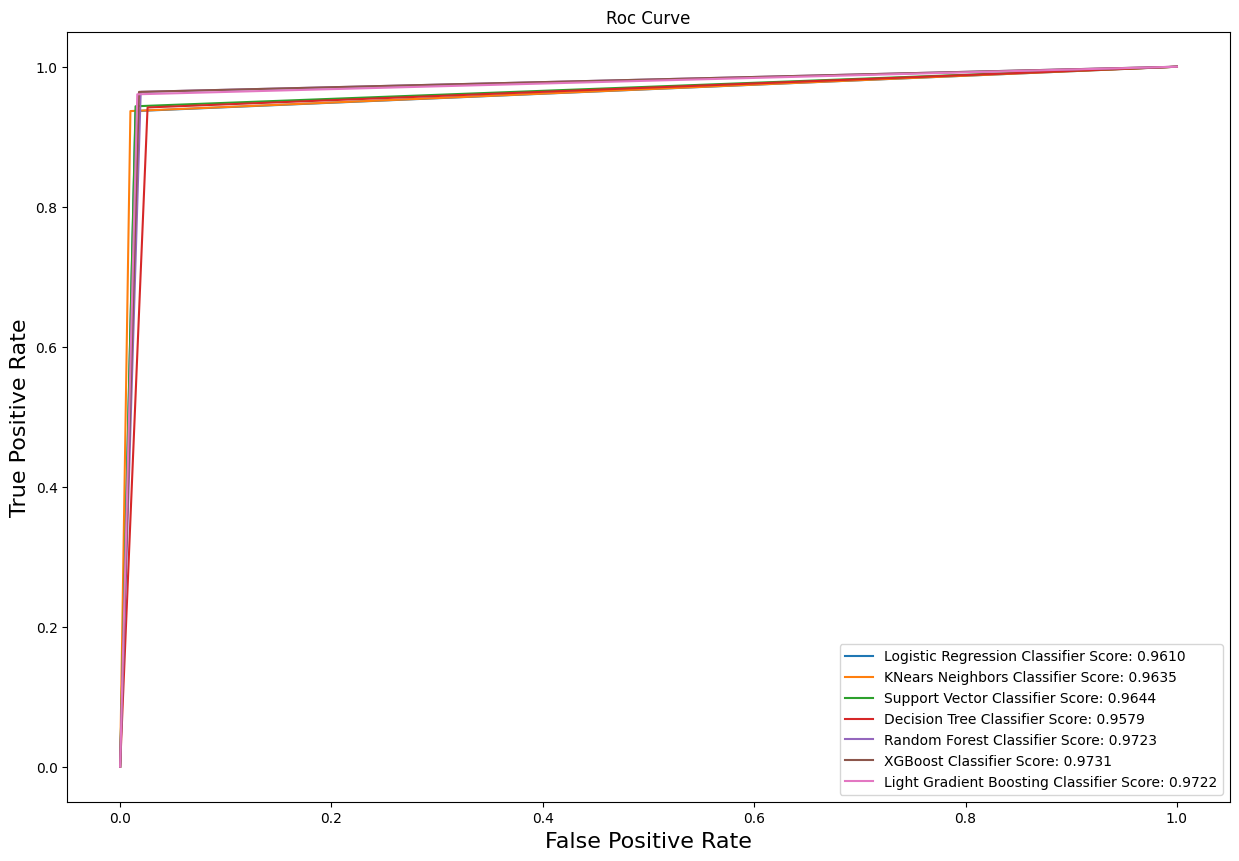

In [ ]:
from sklearn.metrics import roc_curve,roc_auc_score
lg_fpr,lg_tpr,lg_threshold=roc_curve(y_test,y_pred_lr3)
svc_fpr,svc_tpr,svc_threshold=roc_curve(y_test,y_pred_svc2)
dtree_fpr,dtree_tpr,dtree_threshold=roc_curve(y_test,y_pred_dtree2)
rf_fpr,rf_tpr,rf_threshold=roc_curve(y_test,y_pred_rf)
knn_fpr,knn_tpr,rf_threshold=roc_curve(y_test,pred_knn2)
xg_fpr,xg_tpr,xg_threshold=roc_curve(y_test,y_pred_xg)
lgb_fpr,lgb_tpr,lgb_threshold=roc_curve(y_test,y_pred_lgb)

plt.figure(figsize=(15,10))
plt.title("Roc Curve")
plt.plot(lg_fpr,lg_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_test, y_pred_lr3)))
plt.plot(knn_fpr,knn_tpr, label='KNears Neighbors Classifier Score: {:.4f}'.format(roc_auc_score(y_test, pred_knn2)))
plt.plot(svc_fpr, svc_tpr, label='Support Vector Classifier Score: {:.4f}'.format(roc_auc_score(y_test, y_pred_svc2)))
plt.plot(dtree_fpr, dtree_tpr, label='Decision Tree Classifier Score: {:.4f}'.format(roc_auc_score(y_test, y_pred_dtree2)))
plt.plot(rf_fpr,rf_tpr, label='Random Forest Classifier Score: {:.4f}'.format(roc_auc_score(y_test, y_pred_rf)))
plt.plot(xg_fpr,xg_tpr, label='XGBoost Classifier Score: {:.4f}'.format(roc_auc_score(y_test, y_pred_xg)))
plt.plot(lgb_fpr,lgb_tpr, label='Light Gradient Boosting Classifier Score: {:.4f}'.format(roc_auc_score(y_test, y_pred_lgb)))
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.legend()
plt.show()



In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Assuming you have these classifiers defined: lr, svc, dtree, randomforest, knn, clf

base_models = [
    ('logistic', LogisticRegression()),
    ('svm', SVC(probability=True)),
    ('decision_tree', DecisionTreeClassifier()),
    ('random_forest', RandomForestClassifier()),
    ('knn', KNeighborsClassifier()),
    ('xgboost', XGBClassifier(use_label_encoder=False)),
    ('lightgbm', LGBMClassifier())
]

voting_clf = VotingClassifier(estimators=base_models, voting='soft')
voting_clf.fit(X_train, y_train)
y_pred_voting = voting_clf.predict(X_test)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1416, number of negative: 1384
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000163 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1785
[LightGBM] [Info] Number of data points in the train set: 2800, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.505714 -> initscore=0.022858
[LightGBM] [Info] Start training from score 0.022858


In [ ]:
print("Logistic Regression:")
print(classification_report(y_test, y_pred_lr))
print("SVM:")
print(classification_report(y_test, y_pred_svc))
print("Decision Tree:")
print(classification_report(y_test, y_pred_dtree))
print("Random Forest:")
print(classification_report(y_test, y_pred_rf))
print("K Nearest Neighbors:")
print(classification_report(y_test, y_pred_knn))
print("XGBoost:")
print(classification_report(y_test, y_pred_xg))
print("LightGBM:")
print(classification_report(y_test, y_pred_lgb))
print("Voting Classifier:")
print(classification_report(y_test, y_pred_voting))

Logistic Regression:
              precision    recall  f1-score   support

         0.0       0.94      0.99      0.96       616
         1.0       0.99      0.93      0.96       584

    accuracy                           0.96      1200
   macro avg       0.96      0.96      0.96      1200
weighted avg       0.96      0.96      0.96      1200

SVM:
              precision    recall  f1-score   support

         0.0       0.94      0.99      0.96       616
         1.0       0.99      0.93      0.96       584

    accuracy                           0.96      1200
   macro avg       0.96      0.96      0.96      1200
weighted avg       0.96      0.96      0.96      1200

Decision Tree:
              precision    recall  f1-score   support

         0.0       0.97      0.96      0.97       616
         1.0       0.96      0.96      0.96       584

    accuracy                           0.96      1200
   macro avg       0.96      0.96      0.96      1200
weighted avg       0.96      0.96